In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf

데이터 불러오기 

In [16]:
data = pd.read_csv('../data/results.csv', encoding='ISO-8859-1')
print(data.tail())

        Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG   
11108  2021-22  2022-04-09T17:30:00Z  Aston Villa       Tottenham     0     4  \
11109  2021-22  2022-04-10T14:00:00Z    Brentford        West Ham     2     0   
11110  2021-22  2022-04-10T14:00:00Z    Leicester  Crystal Palace     2     1   
11111  2021-22  2022-04-10T14:00:00Z      Norwich         Burnley     2     0   
11112  2021-22  2022-04-10T16:30:00Z     Man City       Liverpool     2     2   

      FTR  HTHG  HTAG HTR  ...  HST  AST   HC   AC    HF    AF   HY   AY   HR   
11108   A   0.0   1.0   A  ...  8.0  5.0  9.0  3.0  12.0  14.0  2.0  3.0  0.0  \
11109   H   0.0   0.0   D  ...  7.0  1.0  4.0  6.0   2.0   6.0  0.0  1.0  0.0   
11110   H   2.0   0.0   H  ...  3.0  3.0  3.0  4.0  11.0  12.0  1.0  1.0  0.0   
11111   H   1.0   0.0   H  ...  6.0  4.0  6.0  7.0  12.0  10.0  1.0  1.0  0.0   
11112   D   2.0   1.0   H  ...  5.0  4.0  4.0  1.0   9.0  11.0  1.0  4.0  0.0   

        AR  
11108  0.0  


HomeTeam" 열에 있는 고유한 팀 이름들을 출력

In [17]:
data["HomeTeam"].unique()

array(['Arsenal', 'Aston Villa', 'Chelsea', 'Liverpool', 'Man City',
       'Newcastle', 'Oldham', 'Sheffield United', 'Southampton',
       'West Ham', 'Norwich', 'Tottenham', 'Everton', 'Ipswich', 'Leeds',
       'Wimbledon', 'Blackburn', 'Coventry', 'Man United', 'QPR',
       'Sheffield Weds', 'Swindon', 'Crystal Palace', 'Leicester',
       "Nott'm Forest", 'Bolton', 'Middlesbrough', 'Derby', 'Sunderland',
       'Barnsley', 'Charlton', 'Watford', 'Bradford', 'Fulham',
       'Birmingham', 'West Brom', 'Portsmouth', 'Wolves', 'Wigan',
       'Reading', 'Hull', 'Stoke', 'Burnley', 'Blackpool', 'Swansea',
       'Cardiff', 'Bournemouth', 'Brighton', 'Huddersfield', 'Brentford'],
      dtype=object)

홈팀과 어웨이 팀을 선택

In [18]:
home = input("홈 팀을 선택해주세요 : ")
away = input("어웨이 팀을 선택해주세요 : ")
print("선택결과 (홈 : 어웨이) : " + home + " : " + away)

선택결과 (홈 : 어웨이) : Chelsea : Liverpool


"HomeTeam"과 "AwayTeam" 열에서 특정 조건을 만족하는 데이터를 필터링하고, 이를 합치는 작업을 수행

In [19]:
preResult = pd.concat([data[data['HomeTeam']==home], data[data['AwayTeam']==home]]).sort_index()
result = pd.concat([preResult[preResult['AwayTeam']==away]]).sort_index()
result

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
90,1993-94,1993-09-25T00:00:00Z,Chelsea,Liverpool,1,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,1994-95,1994-12-18T00:00:00Z,Chelsea,Liverpool,0,0,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,1995-96,1995-12-30T00:00:00Z,Chelsea,Liverpool,2,2,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,1996-97,1997-01-01T00:00:00Z,Chelsea,Liverpool,1,0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2031,1997-98,1998-04-25T00:00:00Z,Chelsea,Liverpool,4,1,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2324,1998-99,1999-02-27T00:00:00Z,Chelsea,Liverpool,2,1,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2790,1999-00,2000-04-29T00:00:00Z,Chelsea,Liverpool,2,0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2901,2000-01,2000-10-01T00:00:00Z,Chelsea,Liverpool,3,0,H,2.0,0.0,H,...,5.0,2.0,3.0,1.0,14.0,14.0,1.0,1.0,0.0,0.0
3368,2001-02,2001-12-16T00:00:00Z,Chelsea,Liverpool,4,0,H,2.0,0.0,H,...,10.0,8.0,5.0,6.0,15.0,10.0,2.0,3.0,0.0,0.0
3957,2002-03,2003-05-11T00:00:00Z,Chelsea,Liverpool,2,1,H,2.0,1.0,H,...,6.0,3.0,4.0,3.0,17.0,13.0,3.0,1.0,0.0,1.0


### 1. new_result = result[result["Season"]>="2000"]:
"result" DataFrame에서 "Season" 열 값이 "2000" 이상인 행들을 새로운 DataFrame으로 필터링하여 new_result에 저장합니다.
이로써 2000년 이후의 경기 결과 데이터만을 가져옵니다.

### 2. new_result.loc[(result.FTR == 'H'),'FTR']=0:
new_result DataFrame의 "FTR" 열에서 값이 'H'인 행들을 찾아서 '0'으로 변경합니다.
'H'는 홈팀이 승리한 경우를 나타내며, 이를 0으로 바꾸어줍니다.

### 3. new_result.loc[(result.FTR == 'A'),'FTR']=2:
new_result DataFrame의 "FTR" 열에서 값이 'A'인 행들을 찾아서 '2'로 변경합니다.
'A'는 원정팀이 승리한 경우를 나타내며, 이를 2로 바꾸어줍니다.

### 4. new_result.loc[(result.FTR == 'D'),'FTR']=1:
new_result DataFrame의 "FTR" 열에서 값이 'D'인 행들을 찾아서 '1'로 변경합니다.
'D'는 무승부인 경우를 나타내며, 이를 1로 바꾸어줍니다.

### 5. x_data = new_result.iloc[:,7:9]:
new_result DataFrame에서 7번째 열부터 8번째 열까지(iloc[:,7:9])의 데이터를 x_data로 가져옵니다.
"HTHG"와 "HTAG" 특성을 선택하여 x_data로 저장합니다.

### 6. y_data = new_result.iloc[:,6]:
new_result DataFrame에서 6번째 열(iloc[:,6])인 "FTR" 열의 데이터를 y_data로 가져옵니다.
이 데이터는 홈팀의 승/무/패 결과를 나타내는 값으로, 이후 One-Hot 인코딩을 위해 사용됩니다.

### 7. y_oneHot = tf.keras.utils.to_categorical(y_data, 3):
y_data를 One-Hot 인코딩하여 y_oneHot으로 저장합니다.
One-Hot 인코딩은 범주형 데이터를 다룰 때 사용되며, 각 클래스에 해당하는 인덱스의 원소만 1이고 나머지는 0인 배열로 변환합니다.

### 8. tf.model = tf.keras.Sequential():
케라스의 Sequential 모델을 생성하여 tf.model 변수에 할당합니다.

### 9. tf.model.add(tf.keras.layers.Dense(units=3, input_dim=x_data.shape[1], activation='softmax')):
tf.model에 입력층으로 Dense 레이어를 추가합니다.
units=3는 출력의 개수로서, 이 경우 3개의 클래스(홈팀 승/무/패)를 구분하므로 3으로 지정합니다.
input_dim=x_data.shape[1]은 입력 데이터의 차원 수를 나타내며, 이 경우 "HTHG"와 "HTAG" 두 개의 특성을 가지므로 x_data.shape[1]인 2로 지정합니다.
activation='softmax'는 출력층의 활성화 함수로 softmax 함수를 사용합니다

In [20]:
new_result = result[result["Season"]>="2000"]
new_result.loc[(result.FTR == 'H'),'FTR']=0
new_result.loc[(result.FTR == 'A'),'FTR']=2
new_result.loc[(result.FTR == 'D'),'FTR']=1
x_data = new_result.iloc[:,7:9]
y_data = new_result.iloc[:,6]
y_oneHot = tf.keras.utils.to_categorical(y_data,3)
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=3,input_dim=x_data.shape[1],activation='softmax'))

모델 컴파일, 파라미터 개수 요약

In [21]:
tf.model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),metrics=['accuracy'])
tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습, 정확도 출력

In [22]:
history = tf.model.fit(x_data,y_oneHot,epochs=500)
print("Accuracy : ",history.history['accuracy'][-1])

Epoch 1/500
1/1 [==============================] - 0s 111ms/step - loss: 1.3834 - accuracy: 0.1818
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1.3580 - accuracy: 0.1818
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 1.3336 - accuracy: 0.1818
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 1.3100 - accuracy: 0.1818
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2873 - accuracy: 0.1818
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1.2655 - accuracy: 0.2727
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 1.2445 - accuracy: 0.2727
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 1.2243 - accuracy: 0.2727
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2049 - accuracy: 0.2727
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1863 - accuracy: 0.2727
Epoch 11/500
1/1 [=========

### 사용자로부터 입력 받은 홈팀의 득점과 원정팀의 득점을 기반으로 경기 결과를 예측하는 작업을 수행
- 예측 결과를 기반으로 확률 값이 0.5보다 큰지를 판단하여 True 또는 False로 출력합니다. 이를 통해 모델이 예측한 결과가 양성(Positive)인지 음성(Negative)인지를 확인합니다.

In [23]:
test_hg = int(input("Enter Home Goal : "))
test_ag = int(input("Enter Away Goal : "))
test_data = np.array([[test_hg,test_ag]])
print(tf.model.predict(test_data),tf.model.predict(test_data)>0.5)

1/1 [==============================] - 0s 11ms/step
[[0.9007978  0.09813268 0.00106952]] [[ True False False]]


### 학습결과 시각화

In [24]:
import matplotlib.pyplot as plt

학습 결과를 저장한 history 객체에서 손실값과 정확도를 가져옵니다.

In [25]:
loss = history.history['loss']
accuracy = history.history['accuracy']

학습 에포크의 개수를 가져옵니다.

In [26]:
epochs = range(1, len(loss) + 1)

손실 그래프

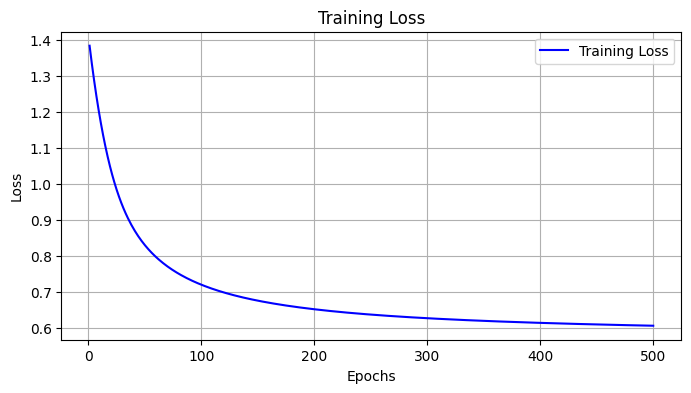

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

정확도 그래프

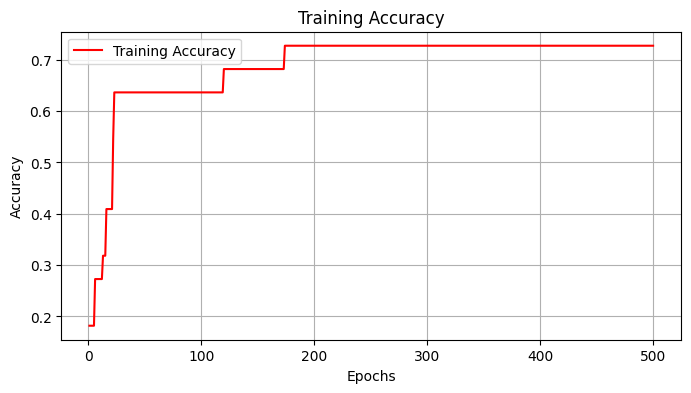

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()